In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

In [4]:
# Step 1: Load the Les Misérables dataset 
G = nx.les_miserables_graph()

In [6]:
# Step 2: Create one-mode and two-mode networks 
# One-mode network (characters only)
one_mode_graph = G

In [7]:
# In this example, we'll assume "community" as groups of characters based on their centrality (for simplicity)
centrality = nx.degree_centrality(G)
communities = {}
for node, cent in centrality.items():
    group = int(cent * 10) # Group based on centrality value 
    if group not in communities:
        communities[group] = [] 
    communities[group].append(node)

In [8]:
B = nx.Graph()
character_nodes = list(G.nodes()) 
community_nodes = list(communities.keys()) 
B.add_nodes_from(character_nodes, bipartite=0) 
B.add_nodes_from(community_nodes, bipartite=1) 
for group, chars in communities.items():
    for char in chars:
        B.add_edge(char, group) 

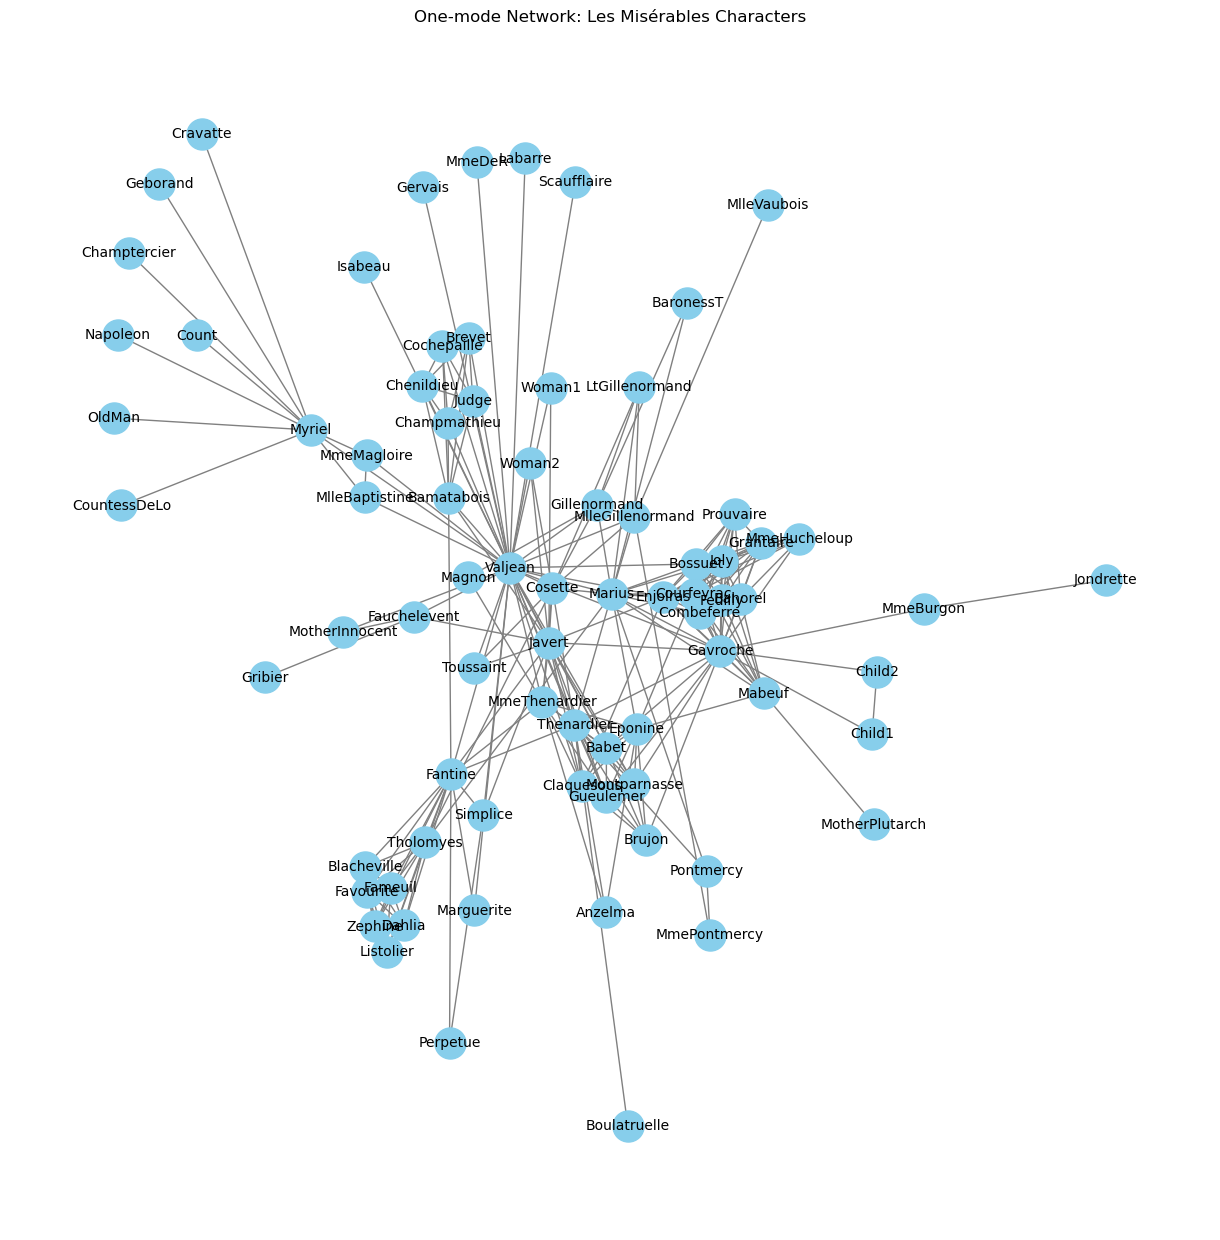

In [9]:
# Step 3: Generate sociograms
# One-mode network sociogram 
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(one_mode_graph)
nx.draw(one_mode_graph, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=500, font_size=10)
plt.title("One-mode Network: Les Misérables Characters") 
plt.show()

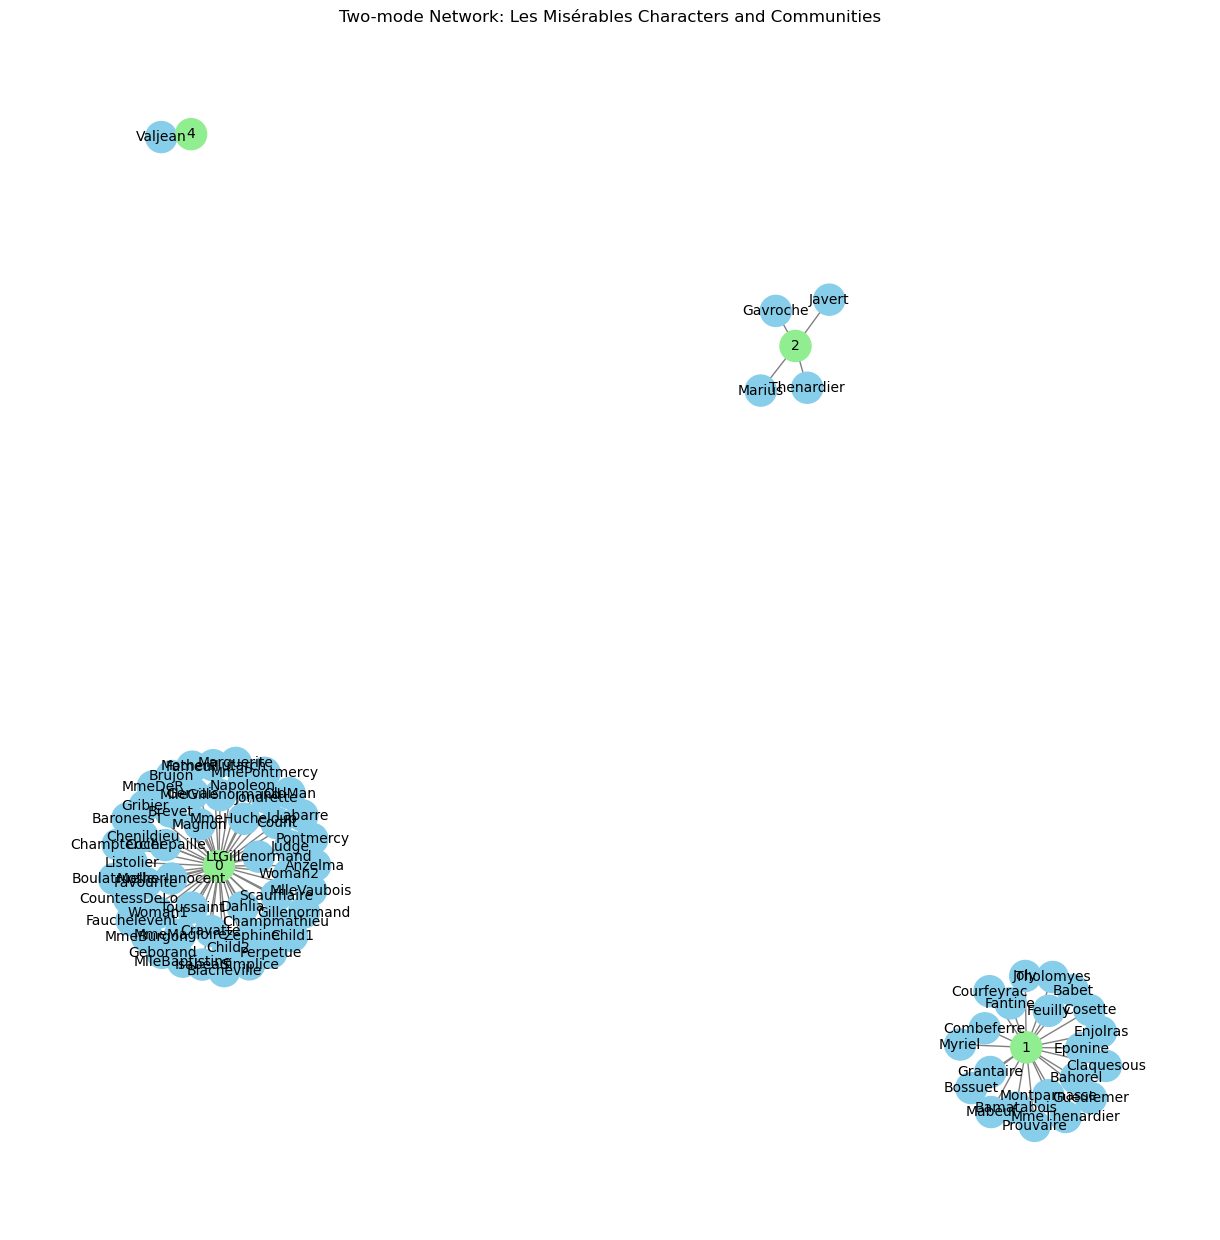

In [10]:
# Two-mode network sociogram 
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(B)
node_colors = ["skyblue" if node in character_nodes else "lightgreen" for node in B.nodes()] 
nx.draw(B, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=500, font_size=10)
plt.title("Two-mode Network: Les Misérables Characters and Communities") 
plt.show()